## 2-4. Phase Estimation Algorithm (Introduction)

In this section, you will learn about a quantum algorithm called **"phase estimation algorithm"**, which is very important for future applications of quantum computers. Phase estimation algorithm is used to estimate the eigenvalues of a unitary matrix. The phase estimation algorithm is used as the basis of many quantum algorithms and is one of the most important quantum algorithms.   
(See `5.2 Phase estimation` in Nielsen-Chuang)

### Introduction: Improving the Hadamard Test
As in [section 2-2](2.2_Hadamard_test.ipynb), consider the problem of estimating the eigenvalue $e^{i\lambda}$ of the unitary operation $U$. In the Hadamard test, the eigenvalue phase $\lambda$ was reflected in the probability distribution of the test measurement results, and $\lambda$ was estimated by sampling many measurement results. Let's see how we can improve this a little more to extract the phase information more directly from the measurement results.

As a preliminary step, the binary expansion of $\lambda/2\pi$ is

$$
\frac{\lambda}{2\pi} = \frac{j_1}{2^1} + \frac{j_2}{2^2} +\cdots+ \frac{j_k}{2^k} +\cdots
$$

The $j_k$ is a (classical) bit that takes the value 0 or 1. Since $\lambda$ only appears in the form $e^{i\lambda}$, we can assume that $0 \leq \lambda < 2\pi$ without loss of generality. This binary expansion is written as follows, following the usual notation for decimals.

$$
\lambda = (2\pi) 0.j_1 j_2 \ldots j_k \ldots
$$

For simplicity, we assume that $\lambda/2\pi$ can be written to $n$ decimal places.

$$
\lambda = (2\pi) 0.j_1 j_2 \ldots j_n
$$

Now, in the Hadamard test we used $\Lambda(U)$ as the control unitary operation, but let us change it a bit and use $\Lambda(U^{2^k})$. As in the first half of [section 2-2](2.2_Hadamard_test.ipynb), we assume that $|\psi\rangle$ is an eigenstate of $U$. After performing the control unitary operation, the state is

$$
\frac{1}{\sqrt{2}}
\left(
 |0\rangle +
 e^{i2^k\lambda} |1\rangle
\right)
\otimes |\psi\rangle
$$

Using the binary expansion above, we get

$$
2^k \lambda =
2^k \cdot (2\pi)0.j_1 j_2 \ldots j_r =
(2\pi)j_1 j_2 \ldots j_k . j_{k+1} \ldots j_n
$$

$e^{i(2\pi)j_1 \ldots j_k} = 1$. Therefore, 

$$
\frac{1}{\sqrt{2}}
\left(
 |0\rangle +
 e^{i(2\pi)0.j_{k+1} \ldots j_n} |1\rangle  \tag{1}
\right)
$$

($|\psi\rangle$ is omitted.)

First, consider the case when $k=n-1$. In this case,

$$
\frac{1}{\sqrt{2}} \left( |0\rangle + e^{i(2\pi)0.j_n} |1\rangle \right)
$$

By applying the Hadamard gate, (Let's check this by substituting $m=0,1$)

$$
\frac{1}{\sqrt{2}} \left( |0\rangle + e^{i(2\pi)0.j_n} |1\rangle \right) \to |j_n\rangle
$$

and can be converted to the state corresponding to the $n$th bit <span style="color:red">$j_n=0, 1$ </span> in the binary decimal representation of $\lambda$. If we measure this state, we can determine the $n$th digit of $\lambda$ with a single measurement, since $j_n$ is observed with 100% probability.   
Next, considering the case $k=n-2$, the state is

$$
\frac{1}{\sqrt{2}} \left( |0\rangle + e^{i(2\pi)0.j_{n-1}j_n} |1\rangle \right)
$$

Since $j_n$ has been checked earlier, we do nothing when $j_n=0$, and when $j_n=1$, by applying $R_2^\dagger$, an example ($l=2$) of the general phase gate, 

$$
R_{l}^\dagger = \begin{pmatrix} 1 & 0\\ 0 & e^{-i \frac{2\pi}{2^l} } \end{pmatrix}
$$

we have

$$
\frac{1}{\sqrt{2}} \left( |0\rangle + e^{i(2\pi)0.j_{n-1}j_n} |1\rangle \right) \to \frac{1}{\sqrt{2}} \left( |0\rangle + e^{i(2\pi)0.j_{n-1}} |1\rangle \right)
$$

And if you apply the Hadamard gate, 

$$
\frac{1}{\sqrt{2}} \left( |0\rangle + e^{i(2\pi)0.j_{n-1}} |1\rangle \right) \to |j_{n-1}\rangle
$$

Therefore, $j_{n-1}$ can also be determined by just one measurement of this state.   
Hereafter, $j_{k+1}$ can be determined from the lower digits by similarly setting $k=n-3, \cdots, 0$.

Thus, by slightly modifying the Hadamard test, the phase of eigenvalues can be extracted one digit at a time as a (definite) qubit state. The phase estimation algorithm described below performs this procedure all at once in a quantum circuit.

### Phase Estimation Algorithm: Overview
Equation (1) in the above improved Hadamard test is probably a form that you have seen somewhere before. Yes, it is the same as the intermediate equation of the quantum Fourier transform (`circuit configuration` section) that you learned in [section 2-3](2.3_quantum_Fourier_transform.ipynb). In fact, the phase estimation algorithm proposed by Kitaev [1] is a modified version of the above algorithm with more measurement qubits, combined with the quantum Fourier transform. Without going into details, let us first introduce what kind of operations the algorithm is capable of.

Let $U$ be a general unitary matrix that can be constructed as a quantum circuit. Let $|{\rm eigen}_l \rangle$  be $U$'s eigenvectors and $e^{i\lambda_l}$ be the corresponding eigenvalues. Suppose we are given some general quantum state $|\psi\rangle$. This can always be expanded in terms of eigenvectors.

$$
|\psi \rangle = \sum _l c_l |{\rm eigen}_l \rangle
$$

Of course, it is not necessary to know what the specific coefficient $c_l$ will be. The **phase estimation algorithm transforms the input state**

$$
|00...0\rangle |\psi\rangle
$$

**to the following state by using** **$n$** **auxiliary qubits**

$$
\sum _l c_l |\lambda_l \rangle | {\rm eigen}_l \rangle 
$$

Here $|\lambda_l\rangle$ is quantum state $|j_1^{(l)}\cdots j_n^{(l)}\rangle$ corresponding to the binary fractional representation of the eigenvalue phase $\lambda_l$, $\lambda_l=(2\pi)0.j_1^{(l)}\cdots j_n^{(l)}$.
(Here we assume that the binary decimal representation of $\lambda_l$ ends at $n$ digits. See also the description in the next section).   
In other words, the phase estimation algorithm is an algorithm **to extract the eigenvalues corresponding to each eigenvector into** **$n$** **auxiliary qubits** in the superposition of $|\psi\rangle$. When we measure the auxiliary qubits for this state, with the probability,

$$
p_l = |c_l |^2
$$


any one eigenvector $|{\rm eigen}_l\rangle$ and its eigenvalue $\lambda_l$ are randomly selected. This algorithm is used as a subroutine in prime factorization, quantum chemical algorithms (energy calculations for molecules, etc.), and many other algorithms, and is **the most important example of how a quantum computer can (and is expected to) solve exponentially faster than a conventional computer.**

### Phase Estimation Algorithm: Configuration
In the following, the phase estimation algorithm will be explained. Here, we restrict the input state $|\psi\rangle$ to the eigenstate $|{\rm eigen}\rangle$ and its eigenvalue $\lambda$  (The generality is not lost since the exact same argument can be used in the case of a superposition of eigenstates.) In the Hadamard test, only one qubit was used for measurement, but in phase estimation, $n$ qubits are reserved as auxiliary qubits for measurement.
The circuit for phase estimation is shown in the following figure.

![PEA](figs/2/PEA.png)

Again, the phase $\lambda$ of the eigenvalue $e^{i\lambda}$ of the unitary operation $U$ using $n$-bit binary decimals is

$$
\lambda = (2\pi) 0.j_1 j_2...j_n
$$

(we assume that the binary decimal representation of $\lambda$ ends at $n$ digits; if it does not, there will be some error in the last measurement, but this error can be overcome if the measurement is repeated. (See the Nielsen-Chuang reference at the beginning for details.)

First, each of the $n$ qubits initialized to $|0\rangle$ is subjected to the Hadamard gate and control unitary operations as in the Hadamard test. However, the $k$-th ($k=1,.... ,n$) auxiliary qubits will be subjected to the control $U^{2^{k-1}}$ operation.   
Since $U|{\rm eigen}\rangle = e^{i2\pi\lambda}|{\rm eigen}\rangle$, the $k$th auxiliary qubit will acquire a phase of $e^{i \lambda 2^k}$ (this is called phase kickback) and we get

 $$
\left( \frac{|0\rangle + e^{i (2\pi)0.j_1\cdots j_n} |1\rangle }{\sqrt{2}} \right) \otimes
\left( \frac{|0\rangle + e^{i (2\pi)0.j_2\cdots j_n} |1\rangle }{\sqrt{2}} \right) \otimes \cdots \otimes
\left( \frac{|0\rangle + e^{i (2\pi)0.j_n} |1\rangle }{\sqrt{2}} \right) \otimes
|{\rm eigen} \rangle
$$

In other words, binary decimal representation of the phase of the eigenvalue is stored in the phase of each auxiliary qubit, with digits shift one position repeatedly.

2. the states of the $n$ auxiliary qubits have exactly the same form as the expression for the result of the quantum Fourier transform studied in [section 2-3](2.3_quantum_Fourier_transform.ipynb). Thus, when the inverse quantum Fourier transform ($QFT^\dagger$ in the figure) is applied to these auxiliary qubits, we obtain

    $$
\left( \frac{|0\rangle + e^{i (2\pi)0.j_1\cdots j_n} |1\rangle }{\sqrt{2}} \right) \otimes
\left( \frac{|0\rangle + e^{i (2\pi)0.j_2\cdots j_n} |1\rangle }{\sqrt{2}} \right) \otimes \cdots \otimes
\left( \frac{|0\rangle + e^{i (2\pi)0.j_n} |1\rangle }{\sqrt{2}} \right) \otimes
\rangle
\rightarrow |j_1...j_n\rangle
$$

Therefore, if we measure the auxiliary qubits at this stage, we can obtain $j_1, j_2,\cdots,j_n$ with 100% probability and obtain the phase $\lambda$ of the eigenvalues of $U$.

In summary, the phase estimation algorithm is to **transfer the information on the phase of eigenvalues to the auxiliary quantum bit** by applying a control $U^{2^k}$ operation with each quantum bit for measurement as a control bit **and then retrieve the phase value by inverse quantum Fourier transform**.

### SymPy example
Let's look at a concrete example using SymPy. 4x4 matrix $U$ is constructed using T and S operations, and the eigenvalues of this matrix are calculated.

In [1]:
from sympy import *
from sympy.physics.quantum import *
from sympy.physics.quantum.qubit import Qubit,QubitBra
init_printing() # to show vectors and matrices nicely
from sympy.physics.quantum.gate import X,Y,Z,H,S,T,CNOT,SWAP,CPHASE,CGateS

In [2]:
# Please run only on Google Colaboratory
from IPython.display import HTML
def setup_mathjax():
    display(HTML('''
    <script>
        if (!window.MathJax && window.google && window.google.colab) {
            window.MathJax = {
                'tex2jax': {
                    'inlineMath': [['$', '$'], ['\\(', '\\)']],
                    'displayMath': [['$$', '$$'], ['\\[', '\\]']],
                    'processEscapes': true,
                    'processEnvironments': true,
                    'skipTags': ['script', 'noscript', 'style', 'textarea', 'code'],
                    'displayAlign': 'center',
                },
                'HTML-CSS': {
                    'styles': {'.MathJax_Display': {'margin': 0}},
                    'linebreaks': {'automatic': true},
                    // Disable to prevent OTF font loading, which aren't part of our
                    // distribution.
                    'imageFont': null,
                },
               'messageStyle': 'none'
            };
            var script = document.createElement("script");
            script.src = "https://colab.research.google.com/static/mathjax/MathJax.js?config=TeX-AMS_HTML-full,Safe";
            document.head.appendChild(script);
        }
    </script>
    '''))
get_ipython().events.register('pre_run_cell', setup_mathjax)

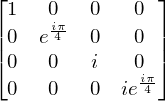

In [10]:
represent(T(0)*S(1),nqubits = 2)

This matrix is already diagonalized, and the eigenvalue phases $\lambda$ are $0, \pi/4, \pi/2, 3\pi/4$, whose binary decimal representations are $(2\pi)0.0, (2\pi)0.001, (2\pi)0.01, (2\pi)0.011$. Therefore, three auxiliary qubits are needed to measure these without error.   
Using the ` CGateS ` function, let us define controlled $U$-gate `cP_2,3,4` . (2,3,4 correspond to the three auxiliary qubits. 0,1 are the spaces in which $U$ acts. In the previous schematic of phase estimation, the bits are named 0,1,2,... from the bottom.

In [11]:
cP_2 = CGateS(2,T(0))*CGateS(2,S(1))
cP_3 = CGateS(3,T(0))*CGateS(3,S(1))
cP_4 = CGateS(4,T(0))*CGateS(4,S(1))

Let us construct a phase estimation algorithm using three auxiliary qubits.   
First, Hadamard gate is applied to all auxiliary qubits.

In [12]:
PhaEst = H(4)*H(3)*H(2)
PhaEst

Next, apply the control unitary once, twice, and four times, respectively.

In [13]:
PhaEst = cP_2*cP_3*cP_3*cP_4*cP_4*cP_4*cP_4*PhaEst

This completes the first half of the phase estimation algorithm. From here, the inverse quantum Fourier transform is constructed.   
First, for the third decimal place, we apply the $H$ operation to the auxiliary qubit 4.

In [2]:
PhaEst = H(4)*PhaEst

The auxiliary qubit 3 is first subjected to the control $R_2^\dagger=S^{-1}=SZ$ operation with auxiliary qubit 4 as the control.

In [15]:
PhaEst = CGateS(4,S(3))*PhaEst
PhaEst = CGateS(4,Z(3))*PhaEst

The $H$ operation is then applied.

In [16]:
PhaEst = H(3)*PhaEst

The three operations are applied to auxiliary qubit 2

- $R_2^\dagger = S^{-1} = SZ$ operation with auxiliary qubit 3 as control qubit
- $R_3^\dagger = TS^{-1} = TSZ$ operation with auxiliary qubit 4 as control qubit
- $H$ operation

In [17]:
PhaEst = CGateS(3,S(2))*PhaEst
PhaEst = CGateS(3,Z(2))*PhaEst

In [18]:
PhaEst = CGateS(4,T(2))*PhaEst
PhaEst = CGateS(4,S(2))*PhaEst
PhaEst = CGateS(4,Z(2))*PhaEst
PhaEst = H(2)*PhaEst

Let's apply the phase estimation algorithm constructed in this way to the eigenvectors. The algorithm itself is very complex.

In [19]:
PhaEst

However, when the algorithm act on the input, 

In [20]:
simplify(qapply(PhaEst*Qubit("00011")))

The output is simple as designed.
The input $|\psi\rangle$ is $|11\rangle$, and the corresponding eigenvalue is $e^{i3\pi/4}$. The auxiliary qubits 2,3,4 are 011, yielding the binary fraction representation of eigenvalue phase $\lambda=3\pi/4$ ! 

For the other inputs,

In [21]:
simplify(qapply(PhaEst*Qubit("00000")))

In [22]:
simplify(qapply(PhaEst*Qubit("00010")))

In [23]:
simplify(qapply(PhaEst*Qubit("00001")))

and it can be verified that the phase information of the four eigenvalues is obtained in the three auxiliary qubits.
Also, if the input state is a superposition state,

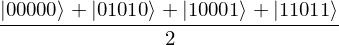

In [24]:
simplify(qapply(PhaEst*H(0)*H(1)*Qubit("00000")))

For each eigenvector, the phase of the eigenvalue is taken out into three auxiliary qubits as a superposition. Measuring the auxiliary qubits in this state yields any one eigenvector and eigenvalue probabilistically.

---
### Column: Prime Factorization and Phase Estimation (somewhat difficult)

An important application of phase estimation is the prime factorization algorithm.
The prime factorization problem is to find a non-1 divisor of $N$ given an $n$-digit integer $N$.
The problem is to find the divisor of $N$ that is not 1, given an $n$-digit integer $N$, and no conventional computer algorithm which can solve this problem in polynomial has been found. The computational cost of the current best algorithm is
\begin{eqnarray}
O\left(\exp \left[\frac{64}{9} n (\log n )^2 \right]^{1/3}\right)
\end{eqnarray}
and takes quasi-exponential computation time.
RSA ciphers and other cryptosystems that take advantage of the difficulty of such prime factorization problems are also used in everyday life.

In 1994, P. Shor proved that the prime factorization problem can be solved in polynomial time for $n$ digits by using a quantum computer. This is the so-called Shor's prime factorization algorithm.

Let $N$ be an integer to be prime factorized. First, find an integer $x$ that is prime to $N$.
($x$ can be easily found by Euclid's reciprocal division method.
Take $x$ at random, and calculate the greatest common divisor of $N$ and $x$ by Euclid's reciprocal division.
If it is an integer other than 1, you have found a nontrivial divisor of $N$ and the (prime) factorization is complete.
If it is only 1, then $x$ is an integer that is prime to $N$.)
In this case, let us consider the rank $r$ of $x$ with respect to $N$.

The rank $r$ is the smallest integer satisfying

\begin{eqnarray}
x^r \equiv 1 \textrm{ (mod $N$)}
\end{eqnarray}

, and it is known that $r$ will be even with high probability if $x$ is chosen at random.
If $r$ is even, the above equation can be transformed as follows.

\begin{eqnarray}
(x^{r/2} + 1) (x^{r/2} - 1)  \equiv 0  \textrm{ (mod $N$)}
\end{eqnarray}

This means that either $x^{r/2} \pm 1 \equiv 0 \: (\textrm{mod} \: N)$ or 
$x^{r/2} + 1$ and $x^{r/2} - 1$ have nontrivial commutations with $N$ (**factor** of $N$).
In fact, we can also show that when $x$ is chosen at random, the probability of the latter is high enough. Therefore, by using Euclid's reciprocal division of the common divisor between $x^{r/2} + 1$ or $x^{r/2} - 1$ and $N$, we can eventually find a nontrivial factor of $N$.
By repeating this process, $N$ can be decomposed into smaller and smaller factors, and finally prime factorization can be achieved.

And the key rank $r$ of the prime factorization can be determined by finding the eigenvalues of the unitary matrix corresponding to the classical calculation of multiplying the input $Y$ by $X$ under mod $N$

$$
U_x = \sum _y |yx \: \textrm{mod} \: N)\rangle \langle y|
$$

Indeed, using the eigenstate labels $0 \leq s \leq r-1$, the eigenvectors can be written down as

$$
|u_s\rangle = \frac{1}{\sqrt{r}}
\sum _{k=0}^{r-1} e^ {-2 \pi i (s/r) k }|x^k (\textrm{mod} \: N)\rangle.
$$

and satisfies the following.

$$
U_x |u_s \rangle =  e^{2 \pi i (s/r)} |u_s \rangle
$$

In other words, from the phase estimate of the eigenvalues of $U_x$, $s/r$ can be obtained ,and $r$ as its denominator (and from that rank $r$, $N$ can be prime factorized by the above procedure).
This is the so-called prime factorization algorithm by Shore (a version using Kitaev's phase estimate).

(See `5.3 Applicaitons: order-finding and factoring` by Nielsen-Chuang for details.)

---
### Summary of Chapter 2
In Chapter 2, we learned the following.

- What is a quantum algorithm, what is the NISQ algorithm and what is a long-term algorithm
- The Hadamard test
- Quantum Fourier transform
- The phase estimation algorithm

The algorithms learned in this chapter, especially the phase estimation algorithm, are very important for mastering quantum computers and have various applications.

1. prime factorization problem: As we saw in the column above, the phase estimation algorithm can be used to estimate a number called the rank, which can be used to perform prime factorization.
2. energy calculation for quantum systems: In quantum mechanics, energy is given by the eigenvalues of a matrix called the Hamiltonian. The energy of the most stable state is given by the smallest eigenvalue, and the stable state by the corresponding eigenvector. Although the Hamiltonian itself is not a unitary matrix, the energy can be calculated by performing a phase estimate on the unitary matrix $e^{-i H t}$ defined by the exponential function of the matrix, which corresponds to the time evolution ([Section 7-1](7.1_quantum_phase_estimation_detailed.ipynb)) .
3. solving a simultaneous linear equation $Ax=b$: Using eigenvalues and eigenvectors obtained by phase estimation, the solution to the simultaneous linear equation can be obtained ([Section 7-2](7.2_Harrow-Hassidim-Lloyd_algorithm.ipynb)). Its application to machine learning has also been studied.